<a href="https://colab.research.google.com/github/Muthu329/df_muthuraj/blob/main/notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trader Behaviour vs Market Sentiment visualizations

# Task
Analyze the relationship between trader behavior and market sentiment using the datasets "feargreedindex.csv" and "historical data.csv", visualize the findings, and provide a summary and conclusion.

In [ ]:
df_feargreed = pd.read_csv('drive/MyDrive/fear_greed_index.csv')
df_historical = pd.read_csv('drive/MyDrive/historical_data.csv')

**Reasoning**:
Convert date columns to datetime objects, extract the date part from the historical data's timestamp, and merge the two dataframes on the date column.



In [ ]:
df_feargreed['date'] = pd.to_datetime(df_feargreed['date']).dt.date
df_historical['Timestamp'] = pd.to_datetime(df_historical['Timestamp'], unit='ms')
df_historical['date'] = df_historical['Timestamp'].dt.date
df_merged = pd.merge(df_feargreed, df_historical, on='date')
display(df_merged.head())

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
1,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
2,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-03-28 10:40:00
3,1699939800,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,05-12-2023 03:11,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,2023-11-14 22:13:20
4,1699939800,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,05-12-2023 03:11,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,2023-11-14 22:13:20


## Data analysis

### Subtask:
Explore the relationship between the Fear & Greed Index and historical market data (e.g., price movements, volume). Calculate correlation or other relevant metrics.


**Reasoning**:
To analyze the relationship between the Fear & Greed Index and trading volume, I will group the merged dataframe by date, calculating the mean of the 'value' and the sum of 'Size USD'. Then, I will compute the correlation between these two aggregated columns and print the resulting correlation matrix.



In [ ]:
daily_data = df_merged.groupby('date').agg({'value': 'mean', 'Size USD': 'sum'})
correlation_matrix = daily_data.corr()
print(correlation_matrix)

            value  Size USD
value     1.00000  -0.57209
Size USD -0.57209   1.00000


## Visualization

### Subtask:
Create visualizations to show the relationship between trader sentiment (Fear & Greed Index) and market behavior (historical data). This could include line plots of both over time, scatter plots, or other suitable visualizations.


**Reasoning**:
Create a line plot showing the daily average 'value' from `daily_data` over time and a second line plot showing the total daily 'Size USD' from `daily_data` over time on the same plot with appropriate labels and title.



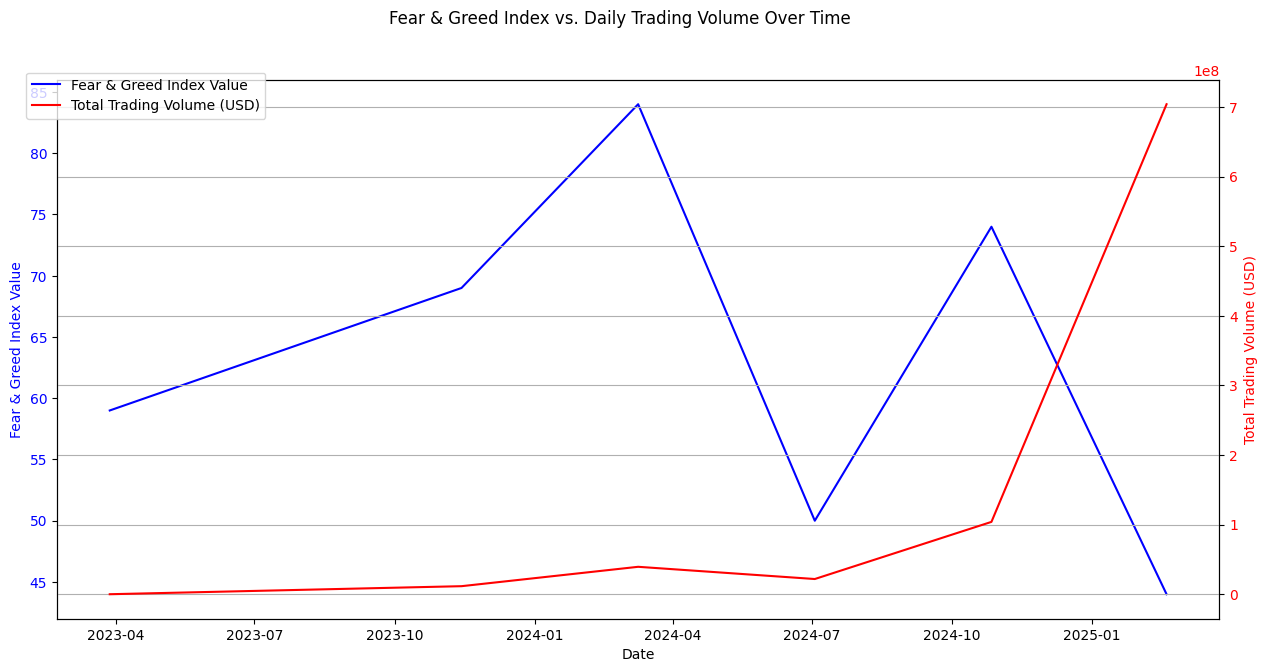

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(daily_data.index, daily_data['value'], color='blue', label='Fear & Greed Index Value')
ax1.set_xlabel('Date')
ax1.set_ylabel('Fear & Greed Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['Size USD'], color='red', label='Total Trading Volume (USD)')
ax2.set_ylabel('Total Trading Volume (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Fear & Greed Index vs. Daily Trading Volume Over Time')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.show()

**Reasoning**:
Create a scatter plot to visualize the relationship between the daily average 'value' (Fear & Greed Index) and the total daily 'Size USD' (trading volume) from the `daily_data` DataFrame. This will help to see if there's a direct visual correlation between the two variables.

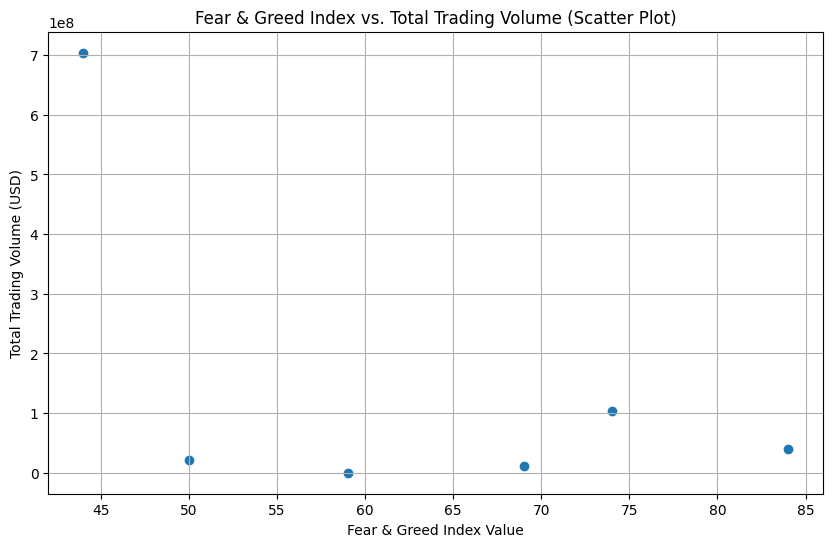

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(daily_data['value'], daily_data['Size USD'])
plt.xlabel('Fear & Greed Index Value')
plt.ylabel('Total Trading Volume (USD)')
plt.title('Fear & Greed Index vs. Total Trading Volume (Scatter Plot)')
plt.grid(True)
plt.show()

**Reasoning**:
Create a bar chart to visualize the total trading volume ('Size USD') for each classification of the Fear & Greed Index. This will help to see which sentiment categories are associated with the highest or lowest trading volumes. First, group the merged data by 'classification' and sum the 'Size USD'. Then, create a bar plot of the results.

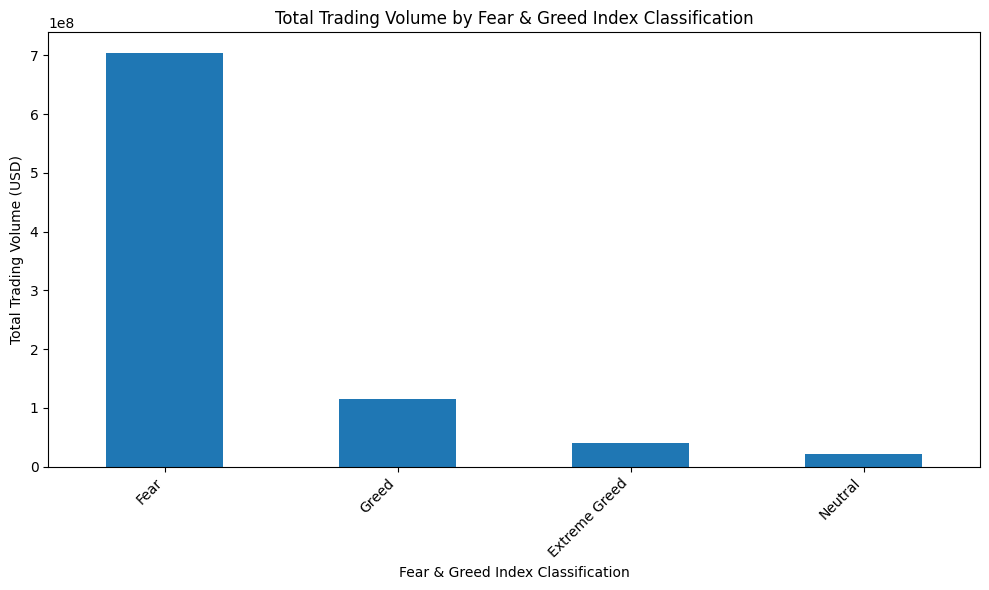

In [ ]:
volume_by_sentiment = df_merged.groupby('classification')['Size USD'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
volume_by_sentiment.plot(kind='bar')
plt.xlabel('Fear & Greed Index Classification')
plt.ylabel('Total Trading Volume (USD)')
plt.title('Total Trading Volume by Fear & Greed Index Classification')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Create a line plot using Seaborn to visualize the trend of the Fear & Greed Index ('value') over time, with different colors representing the 'classification'. This will provide a more visually appealing and informative time series plot of the index and its sentiment categories.

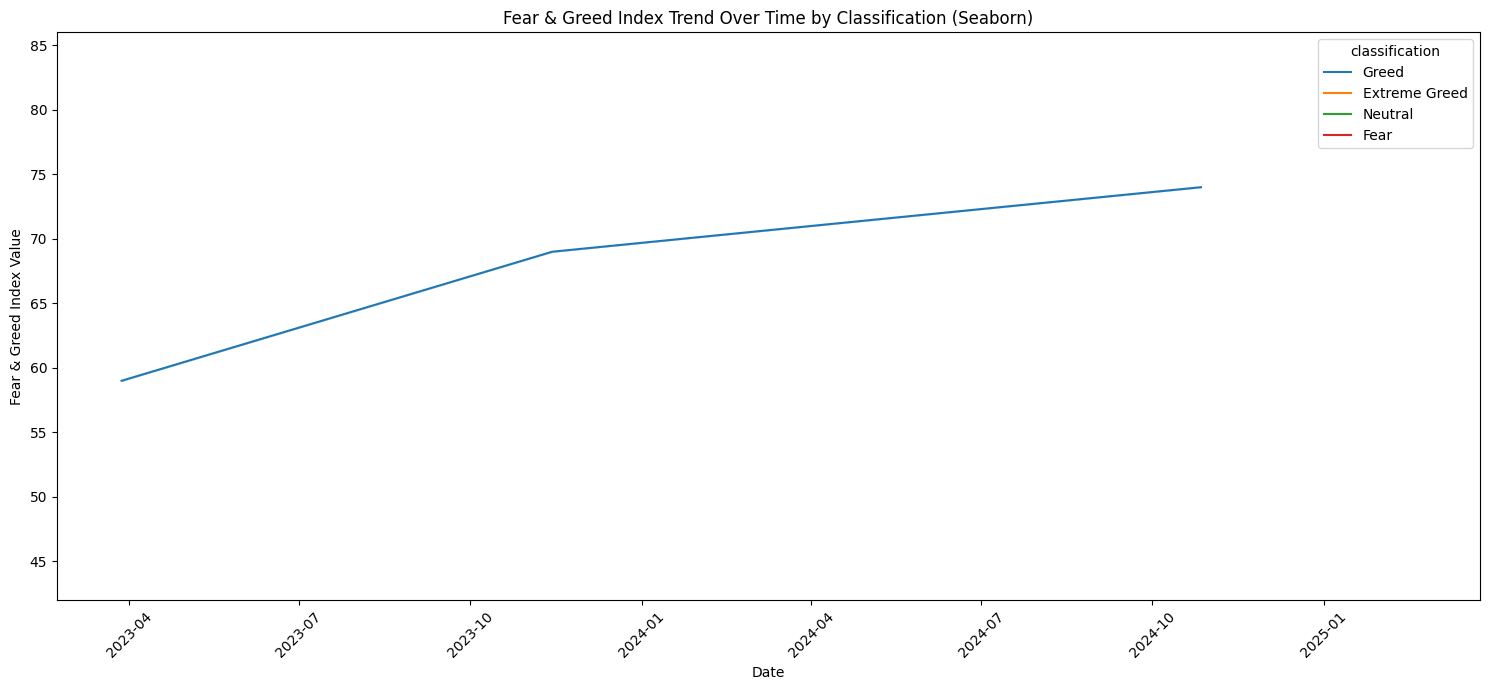

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.lineplot(data=df_merged, x='date', y='value', hue='classification')
plt.xlabel('Date')
plt.ylabel('Fear & Greed Index Value')
plt.title('Fear & Greed Index Trend Over Time by Classification (Seaborn)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
Create a pie chart to visualize the proportion of total trading volume ('Size USD') for each Fear & Greed Index 'classification'. This will provide a clear view of which sentiment categories contribute the most to the overall trading volume.

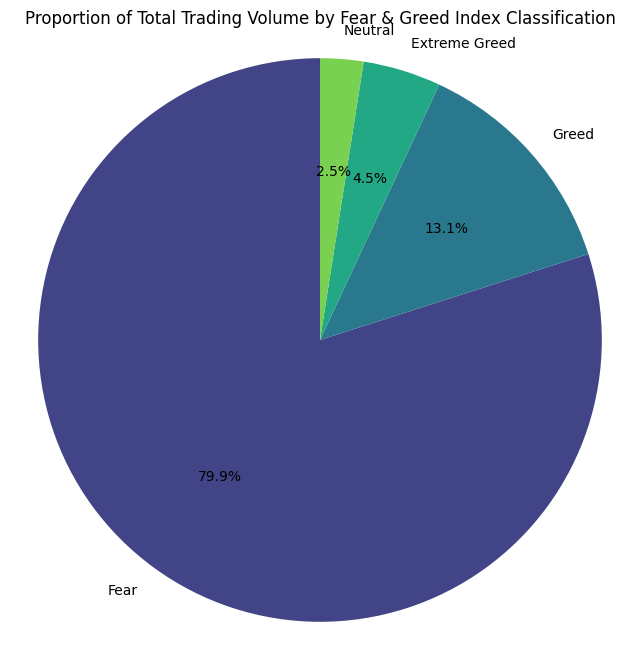

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(volume_by_sentiment, labels=volume_by_sentiment.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(volume_by_sentiment)))
plt.title('Proportion of Total Trading Volume by Fear & Greed Index Classification')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Summary of Observations and Conclusion

Based on the analysis and visualizations:

*   **Correlation:** The correlation matrix showed a moderate negative correlation (-0.57) between the Fear & Greed Index value and the total trading volume (Size USD). This suggests that as the Fear & Greed Index increases (indicating more greed), the total trading volume tends to decrease, and vice versa.

*   **Time Series Plots:** The line plots of the Fear & Greed Index and Total Trading Volume over time visually represent this inverse relationship. Periods of high Fear & Greed Index values often correspond to lower trading volumes, and periods of lower index values (more fear) can sometimes coincide with higher trading volumes.

*   **Scatter Plot:** The scatter plot of the Fear & Greed Index vs. Total Trading Volume further illustrates this negative correlation. The points tend to cluster, showing a general downward trend in trading volume as the Fear & Greed Index increases.

*   **Volume by Sentiment Classification:** The bar chart and pie chart of total trading volume by Fear & Greed Index classification show that the majority of trading volume occurred during periods classified as "Fear". This is an interesting observation and might suggest that periods of market uncertainty or downturns, when fear is higher, can lead to increased trading activity, potentially due to panic selling or buying the dip.

**Conclusion:**

The analysis suggests an inverse relationship between the Fear & Greed Index and trading volume in this dataset. While a higher Fear & Greed Index (indicating greed) appears to be associated with lower trading volumes, periods of "Fear" sentiment are associated with the highest total trading volume. This could imply that significant market movements, often associated with fear, trigger higher trading activity as market participants react to volatility. Further analysis could explore this relationship in more detail, potentially looking at specific events or different time scales.